- definir linha que divide os clusters (alunos bons e ruins)
- verificar se há diferença estatísticas entre os clusters de alunos ruins entre as disciplinas, tal como entre os alunos bons. 
- verificar se há diferença estatísticas entre os clusters de alunos ruins entre os cursos (espanhol presencial e a distancia, segurança do trabalho presencial e a distância), tal como entre os alunos bons
- para cada cluster fazer a análise de PCA dos atributos de caracterização social. 
-  índice que indique se um determinado aluno pertence quantas vezes a cada grupo. Por exemplo:

In [1]:
#import os pacotes utilizados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
#from pylab import *
#from scipy.optimize import curve_fit
from sklearn.cluster import KMeans
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
from random import random

In [2]:
#import os dataframe do IFRN
df_aluno = pd.read_json('thiago/Aluno.json')
df_Caracterizacao = pd.read_json("thiago/Caracterizacao.json")
df_Raca = pd.read_json("thiago/Raca.json")
df_EstadoCivil = pd.read_json("thiago/EstadoCivil.json")
df_SituacaoMatricula = pd.read_json("thiago/SituacaoMatricula.json")
df_Disciplina = pd.read_json("thiago/Disciplina.json")
df_NivelEscolaridade = pd.read_json("thiago/NivelEscolaridade.json")
df_Notas = pd.read_json("thiago/Notas.json")
df_SituacaoDisciplina = pd.read_json("thiago/SituacaoDisciplina.json")
df_CursoCampus = pd.read_json('thiago/CursoCampus.json')
df_MatriculaPeriodo = pd.read_json("thiago/MatriculaPeriodo.json")
df_CompanhiaDomiciliar = pd.read_json("thiago/CompanhiaDomiciliar.json")
df_RazaoAfastamentoEducacional = pd.read_json("thiago/RazaoAfastamentoEducacional.json")
df_ContribuinteRendaFamiliar = pd.read_json("thiago/ContribuinteRendaFamiliar.json")

df_SituacaoTrabalho = pd.read_json("thiago/SituacaoTrabalho.json")
df_TipoImovelResidencial = pd.read_json("thiago/TipoImovelResidencial.json")
df_TipoServicoSaude = pd.read_json("thiago/TipoServicoSaude.json")
df_TipoEscola = pd.read_json("thiago/TipoEscola.json")
df_TipoAreaResidencial = pd.read_json("thiago/TipoAreaResidencial.json")
df_TipoAcessoInternet = pd.read_json("thiago/TipoAcessoInternet.json")
df_BeneficioGovernoFederal = pd.read_json("thiago/BeneficioGovernoFederal.json")
df_NecessidadeEspecial = pd.read_json("thiago/NecessidadeEspecial.json")
df_MeioTransporte = pd.read_json("thiago/MeioTransporte.json")
df_Idioma = pd.read_json("thiago/Idioma.json")



In [4]:
"""
é criado um novo frame com a junção das notas e disciplinas e restringindo que apenas disciplinas com mais de 60 instâncias, 
uma vez que cada disciplina será dividade em dois grupos (alunos aprovado e reprovados) e cada grupo desse deve ter 
ao menos 30 instâncias devido a teoria do limite central 
"""
#merge entre frame notas e disciplinas
print(df_Notas.shape)
merged = pd.merge(df_Notas, df_Disciplina, left_on="disciplina_id", right_on="id", suffixes=["_L", "_R"])
print(merged.shape)

#filtra disciplinas com registros maiores que 60 - 2 classes com min de 30 (teorema do limite central pg. 55 Laura Igual)
merged = merged.groupby('disciplina_id').filter(lambda x: len(x) > 60)
print(merged.shape)

#agrupando e gerando as estatisticas da media final
merged.groupby("descricao_historico")['media_final'].describe().unstack()

(36436, 6)
(36436, 9)
(34514, 9)


,count,mean,std,min,25%,50%,75%,max
descricao_historico,,,,,,,,
Análise e Elaboração de Materiais de E/LE,68.0,50.970588,37.422545,0.0,11.75,64.5,86.00,98.0
Atividades de Metodologia do Ensino de ELE I,79.0,61.278481,36.419541,0.0,24.50,70.0,96.50,100.0
Controle Ambiental(60H),364.0,55.629121,29.439059,0.0,35.75,66.0,75.00,96.0
Cultura Hispânica I,122.0,50.934426,33.835220,0.0,13.25,61.5,75.00,100.0
Desenho Técnico(60H),1369.0,55.860482,38.401678,0.0,0.00,72.0,88.00,100.0
Desenvolvimento de Projeto Integrador,824.0,66.637136,37.639502,0.0,60.00,80.0,95.00,100.0
Desenvolvimento de Projetos Integradores I,166.0,55.728916,41.187436,0.0,0.00,77.0,88.00,100.0
Desenvolvimento de Projetos Integradores II,90.0,58.055556,43.854807,0.0,0.00,82.5,93.00,100.0
Dialetologia do Espanhol,100.0,56.780000,28.324091,0.0,35.00,66.0,75.50,100.0


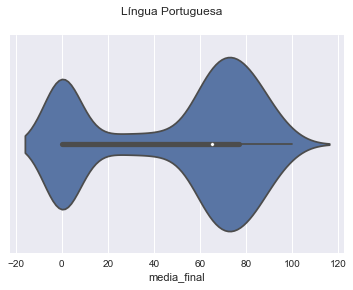

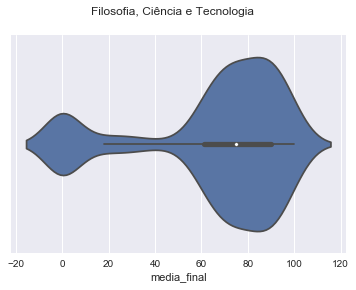

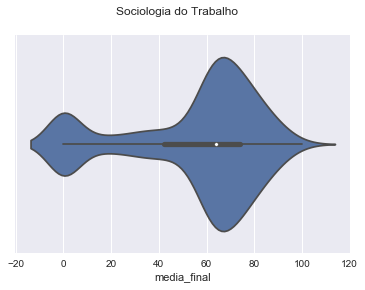

In [37]:
"""
é plotado o gráfico violiono (boxplot + histogram) por disciplina, a fim de verificar o formato da distribuição
"""

#gerando graficos
%matplotlib inline

plt.close('all')

cnt = 0

#loop sobre cada disciplina
for index1, group1 in merged.groupby(['disciplina_id']):    
    fig = plt.figure()
    sns.plt.suptitle(group1.iloc[1]['descricao_historico'])
    sns.violinplot(merged[merged.disciplina_id == index1]['media_final'])
    
    cnt += 1
    if cnt == 3:
        break

C:\Users\Thiago\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\Thiago\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:889: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
C:\Users\Thiago\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\Thiago\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


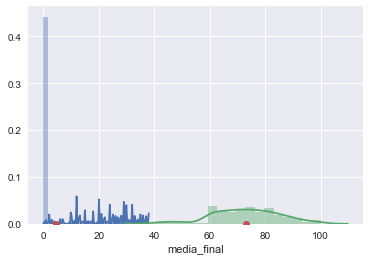

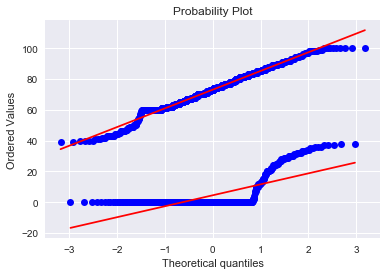

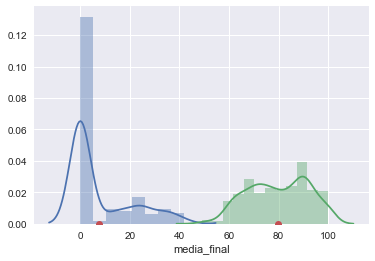

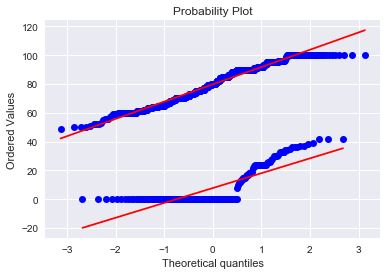

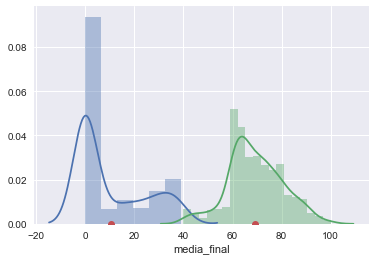

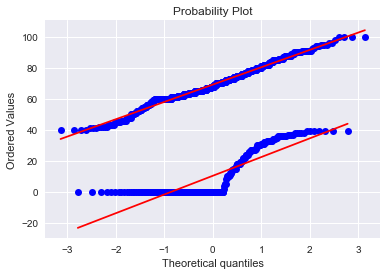

In [6]:
"""
é realizado a clusterização por disciplina em dois grupos (alunos aprovado e reprovados). é criado dentro do frame um novo
atributo chamado 'classe', o qual identifica a qual grupo aquele aluno pertence (0 reprovado, 1 aprovado). 

aqui a operação está limitada em 3, uma vez que a mesma gera gráficos e ficaria muito pesado o processamento. 
na cell seguinte a operação é realizada de forma completa sem gerar os gráficos
"""

%matplotlib inline
plt.close('all')

#cria coluna 'classe' no frame merged inicializado com -1, a fim de controle
merged['classe'] = np.ones(merged.shape[0])*-1

#definir linha que divide os clusters (alunos bons e ruins)
cnt = 0

for index1, group1 in merged.groupby(['disciplina_id']):    
    
    #recuperando as notas apenas daquela disciplina    
    data = merged[merged.disciplina_id == index1]['media_final']
    
    #recuperando os clusters
    cluster = KMeans(n_clusters=2, init=np.array([[0], [10]]))
    cluster.fit(data.reshape(-1,1))
    #print(cluster.cluster_centers_)
        
    #atribuindo a classe
    merged.loc[merged.disciplina_id == index1, 'classe'] = cluster.predict(data.reshape(-1,1))
    
    
    #figura mostrando a clusterizacao
    fig = plt.figure()
    sns.distplot( merged[(merged.disciplina_id == index1) & (merged.classe == 0)]['media_final'] )
    sns.distplot( merged[(merged.disciplina_id == index1) & (merged.classe == 1)]['media_final'] )
    plt.plot(cluster.cluster_centers_, [0, 0], "o")
    
    #figura mostrando o ajuste dos dados aos clusters
    fig = plt.figure()
    stats.probplot(merged[(merged.disciplina_id == index1) & (merged.classe == 0)]['media_final'], plot=plt)
    stats.probplot(merged[(merged.disciplina_id == index1) & (merged.classe == 1)]['media_final'], plot=plt)
    
    #gerando kde para confirmar a clusterização
    
    #break
    
    cnt += 1
    if cnt == 3:
        break
    

In [7]:
"""
é realizado a clusterização por disciplina em dois grupos (alunos aprovado e reprovados). é criado dentro do frame um novo
atributo chamado 'classe', o qual identifica a qual grupo aquele aluno pertence (0 reprovado, 1 aprovado). 
"""

#criar coluna classe no merged
merged['classe'] = np.ones(merged.shape[0])*-1

#loop que para cada disciplina divide os clusters entre alunos aprovados e reprovados
for index1, group1 in merged.groupby(['disciplina_id']):    
    
    #recuperando as notas apenas daquela disciplina    
    data = merged[merged.disciplina_id == index1]['media_final']
    
    #clusters utilizando o kmeans inicializando em 0 e 10. 
    cluster = KMeans(n_clusters=2, init=np.array([[0], [10]]))
    #o -1 é hack para trabalhar com dados de 1 dimensão
    cluster.fit(data.reshape(-1,1))
    #print(cluster.cluster_centers_)
        
    #atribuindo a classe
    merged.loc[merged.disciplina_id == index1, 'classe'] = cluster.predict(data.reshape(-1,1))

C:\Users\Thiago\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\Thiago\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:889: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
C:\Users\Thiago\Anaconda3\lib\site-packages\ipykernel\__main__.py:22: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


In [8]:
"""
exibe descrição estatística das notas das disciplinas agrupadas por disciplina e classe
"""
merged.groupby(['descricao_historico', 'classe'])['media_final'].describe().unstack()

count        mean  \
descricao_historico                                classe                       
Análise e Elaboração de Materiais de E/LE          0.0       28.0    9.000000   
                                                   1.0       40.0   80.350000   
Atividades de Metodologia do Ensino de ELE I       0.0       22.0    8.000000   
                                                   1.0       57.0   81.842105   
Controle Ambiental(60H)                            0.0       93.0    9.247312   
                                                   1.0      271.0   71.546125   
Cultura Hispânica I                                0.0       41.0    7.170732   
                                                   1.0       81.0   73.086420   
Desenho Técnico(60H)                               0.0      446.0    3.316143   
                                                   1.0      923.0   81.250271   
Desenvolvimento de Projeto Integrador              0.0      186.0    0.516129   
                                                   1.0      638.0   85.913793   
Desenvolvimento de Projetos Integradores I         0.0       57.0    0.000000   
                                                   1.0      109.0   84.871560   
Desenvolvimento de Projetos Integradores II        0.0       32.0    0.000000   
                                                   1.0       58.0   90.086207   
Dialetologia do Espanhol                           0.0       27.0   14.592593   
                                                   1.0       73.0   72.383562   
Didática                                           0.0       31.0    5.322581   
                                                   1.0      133.0   78.669173   
Direito Aplicado à Segurança e Saúde no Trabalh... 0.0      235.0   11.336170   
                                                   1.0      610.0   67.413115   
EAD: Fundamentos e Práticas Aplicados a Educação   0.0        7.0   13.428571   
                                                   1.0      138.0   79.123188   
Educação Inclusiva                                 0.0       46.0    6.000000   
                                                   1.0       90.0   77.233333   
Ergonomia(60H)                                     0.0      179.0    6.614525   
                                                   1.0      572.0   76.440559   
Estatística Aplicada à Segurança do Trabalho(30H)  0.0      490.0    4.008163   
                                                   1.0      911.0   75.772777   
...                                                           ...         ...   
Qualidade de Vida e Trabalho                       1.0      291.0   74.127148   
Saúde Ocupacional(30H)                             0.0      213.0    7.356808   
                                                   1.0      868.0   72.355991   
Segurança do Trabalho(60H)                         0.0      163.0    9.950920   
                                                   1.0      581.0   74.538726   
Seminário de Iniciação à Pesquisa(30H)             0.0      235.0    7.029787   
                                                   1.0      748.0   85.596257   
Seminário de Integração Acadêmica                  0.0      129.0    0.000000   
                                                   1.0      141.0  100.000000   
Seminário de Integração Acadêmica(10H)             0.0     1111.0    0.000000   
Seminário de Orientação de Estágio Docente I       0.0       29.0    5.206897   
                                                   1.0       48.0   83.895833   
Seminário de Orientação de Estágio Docente III     0.0       24.0    0.000000   
                                                   1.0       39.0   81.051282   
Seminário de Orientação de Pesquisa I              0.0       47.0    0.000000   
                                                   1.0       37.0   78.594595   
Seminário de Orientação de Projeto Integrador I    0.0       57.0    0.000000   
          

In [9]:
"""
é realizado a restrição para disciplinas que possuam menos que 30 instâncias por classe (alunos aprovados e reprovados), 
baseando na teoria do limite central
"""
#filtra disciplinas com registros maiores que 30 por classe (teorema do limite central pg. 55 Laura Igual)
#print(merged.shape)
merged = merged.groupby(['descricao_historico', 'classe']).filter(lambda x: len(x) > 30)
#print(merged.shape)

#filtra disciplina que tem apenas uma das classes
merged = merged.groupby(['descricao_historico']).filter(lambda x: x["classe"].std() > 0)
merged.groupby(['descricao_historico', 'classe'])['media_final'].describe().unstack()

count        mean  \
descricao_historico                                classe                      
Controle Ambiental(60H)                            0.0      93.0    9.247312   
                                                   1.0     271.0   71.546125   
Cultura Hispânica I                                0.0      41.0    7.170732   
                                                   1.0      81.0   73.086420   
Desenho Técnico(60H)                               0.0     446.0    3.316143   
                                                   1.0     923.0   81.250271   
Desenvolvimento de Projeto Integrador              0.0     186.0    0.516129   
                                                   1.0     638.0   85.913793   
Desenvolvimento de Projetos Integradores I         0.0      57.0    0.000000   
                                                   1.0     109.0   84.871560   
Desenvolvimento de Projetos Integradores II        0.0      32.0    0.000000   
                                                   1.0      58.0   90.086207   
Didática                                           0.0      31.0    5.322581   
                                                   1.0     133.0   78.669173   
Direito Aplicado à Segurança e Saúde no Trabalh... 0.0     235.0   11.336170   
                                                   1.0     610.0   67.413115   
Educação Inclusiva                                 0.0      46.0    6.000000   
                                                   1.0      90.0   77.233333   
Ergonomia(60H)                                     0.0     179.0    6.614525   
                                                   1.0     572.0   76.440559   
Estatística Aplicada à Segurança do Trabalho(30H)  0.0     490.0    4.008163   
                                                   1.0     911.0   75.772777   
Filosofia da Linguagem                             0.0      44.0   18.250000   
                                                   1.0      61.0   71.573770   
Filosofia, Ciência e Tecnologia                    0.0     188.0    7.723404   
                                                   1.0     796.0   79.753769   
Fonética e Fonologia do Espanhol I                 0.0      72.0   25.611111   
                                                   1.0     164.0   72.054878   
Fundamentos Históricos e Filosóficos da Educação   0.0      91.0    8.945055   
                                                   1.0     204.0   76.220588   
...                                                          ...         ...   
Psicologia Geral(30H)                              0.0     462.0    3.720779   
                                                   1.0     901.0   81.801332   
Psicologia da Educação                             0.0      36.0    9.555556   
                                                   1.0     155.0   75.812903   
Psicologia do Trabalho(60H)                        0.0     358.0   10.072626   
                                                   1.0     777.0   70.555985   
Qualidade de Vida e Trabalho                       0.0      65.0   13.676923   
                                                   1.0     291.0   74.127148   
Saúde Ocupacional(30H)                             0.0     213.0    7.356808   
                                                   1.0     868.0   72.355991   
Segurança do Trabalho(60H)                         0.0     163.0    9.950920   
                                                   1.0     581.0   74.538726   
Seminário de Iniciação à Pesquisa(30H)             0.0     235.0    7.029787   
                                                   1.0     748.0   85.596257   
Seminário de Integração Acadêmica                  0.0     129.0    0.000000   
                                                   1.0     141.0  100.000000   
Seminário de Orientação de Pesquisa I              0.0      47.0    0.000000   
                                                   1.0     

In [36]:
"""
é verificado par a par por disciplina e classe se elas possuem diferença estatística significativa 
"""
#test de normalidade
#stats.normaltest

#test se duas amostras são da mesma distribuição
df_ind0 = pd.DataFrame()
df_ind1 = pd.DataFrame()
#stats.ttest_ind(a,b)

#para cada disciplina realizar o teste
for index1, group1 in merged.groupby(['disciplina_id']):   
    #print(merged[(merged.disciplina_id == index1) & (merged.classe == 0)]['media_final'].shape)
    #print(stats.normaltest(merged[(merged.disciplina_id == index1) & (merged.classe == 0)]['media_final']))
    #print(stats.normaltest(merged[(merged.disciplina_id == index1) & (merged.classe == 1)]['media_final']))
    
    arr_test0 = []
    arr_test1 = []
    
    for index2, group2 in merged.groupby(['disciplina_id']):
        #recupera os dados dos alunos reprovados das disciplinas que serão testadas
        mf10 = merged[(merged.disciplina_id == index1) & (merged.classe == 0)]['media_final']
        mf20 = merged[(merged.disciplina_id == index2) & (merged.classe == 0)]['media_final']
        
        #recupera os dados dos alunos aprovados das disciplinas que serão testadas
        mf11 = merged[(merged.disciplina_id == index1) & (merged.classe == 1)]['media_final']
        mf21 = merged[(merged.disciplina_id == index2) & (merged.classe == 1)]['media_final']
    
        #This is a two-sided test for the null hypothesis that 2 independent 
        #samples have identical average (expected) values
        arr_test0.append( stats.ttest_ind(mf10,mf20, equal_var=False).pvalue )
        arr_test1.append( stats.ttest_ind(mf11,mf21, equal_var=False).pvalue )
        
        if (index1 == index2):
            v0 = stats.ttest_ind(mf10,mf20, equal_var=False)
            v1 = stats.ttest_ind(mf11,mf21, equal_var=False)
            print("------------------------------------------")
            print(v0)
            print(v1)
            if (np.isnan(v0.pvalue)):
                print("OLHA ISSO")
                print(mf10.head)
                print(mf11.head)
            
        
    #salvando os testes
    df_ind0[index1] = arr_test0
    df_ind1[index1] = arr_test1    
    #break

------------------------------------------
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=0.0, pvalue=1.0)
------------------------------------------
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=0.0, pvalue=1.0)
------------------------------------------
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=0.0, pvalue=1.0)
------------------------------------------
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=0.0, pvalue=1.0)
------------------------------------------
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=0.0, pvalue=1.0)
------------------------------------------
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=0.0, pvalue=1.0)
------------------------------------------
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indResult(statistic=0.0, pvalue=1.0)
------------------------------------------
Ttest_indResult(statistic=0.0, pvalue=1.0)
Ttest_indRe

C:\Users\Thiago\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Thiago\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Thiago\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


------------------------------------------
Ttest_indResult(statistic=nan, pvalue=nan)
Ttest_indResult(statistic=0.0, pvalue=1.0)
OLHA ISSO
<bound method NDFrame.head of 35058    0
35059    0
35062    0
35064    0
35074    0
35078    0
35080    0
35082    0
35084    0
35086    0
35093    0
35097    0
35098    0
35103    0
35107    0
35109    0
35110    0
35111    0
35117    0
35118    0
35121    0
35130    0
35131    0
35132    0
35134    0
35137    0
35144    0
35145    0
35146    0
35150    0
35154    0
35157    0
35158    0
35159    0
35166    0
35174    0
35175    0
35178    0
35180    0
35181    0
35182    0
35183    0
35187    0
35189    0
35193    0
35196    0
35199    0
35200    0
35201    0
35204    0
35205    0
35207    0
35212    0
35213    0
35214    0
35216    0
35217    0
Name: media_final, dtype: int64>
<bound method NDFrame.head of 35053    100
35054     75
35055     75
35056     93
35057     88
35060     88
35061     75
35063     86
35065     88
35066     92
35067     7

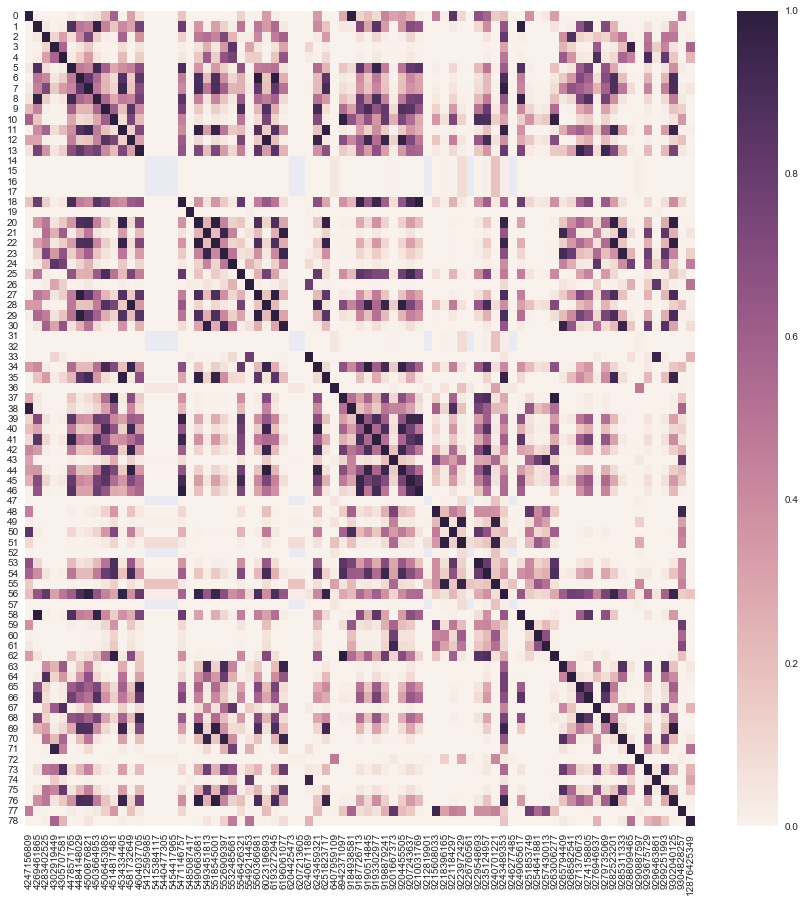

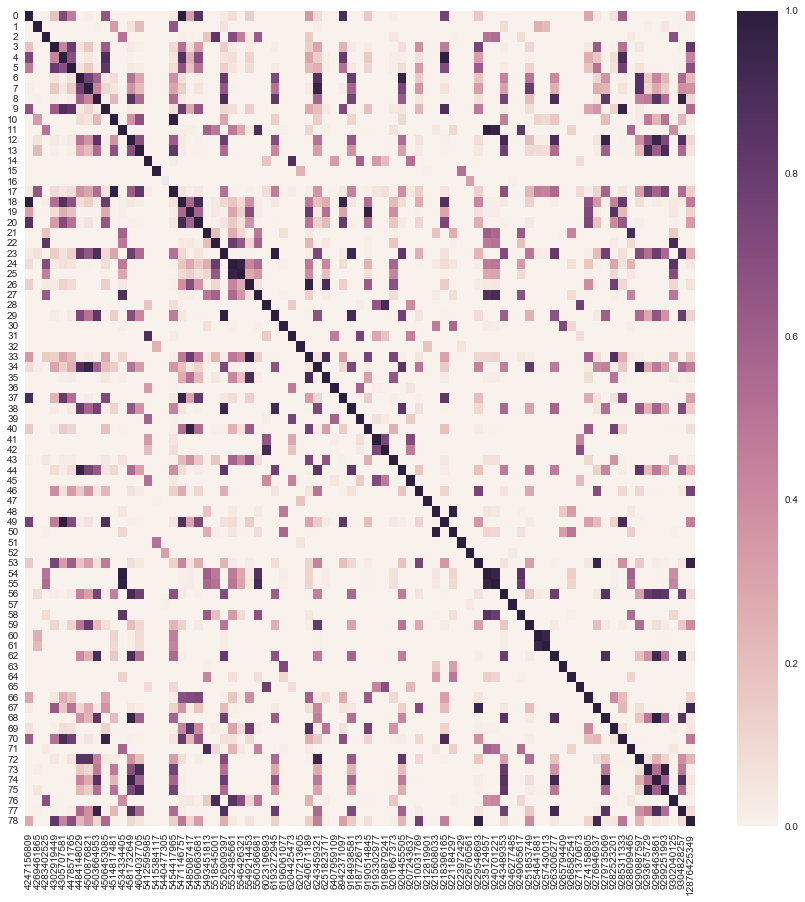

In [12]:
"""
é mostrado o resultado a partir do heatmap
"""
#grafico de testes
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_ind0)

fig = plt.figure()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_ind1)

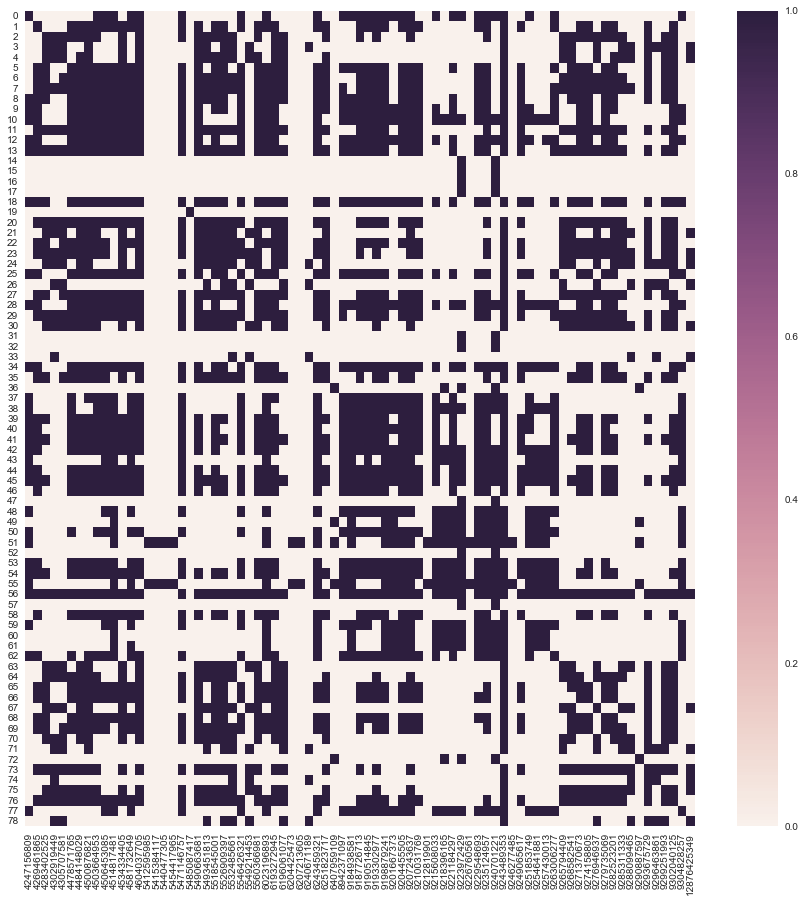

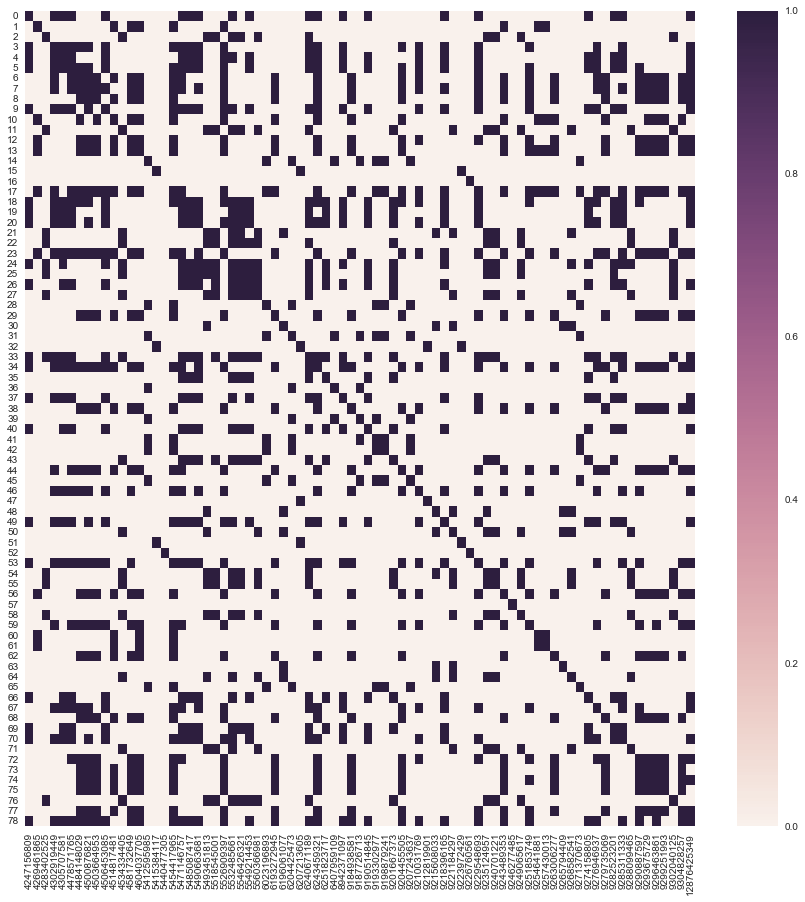

In [17]:
"""
é mostrado o gráfico que exibe em preto amostras que são independentes
"""
def f(x):
    if x > 0.05:
        x = 1
    else:
        x = 0
    return x

df_ind0 = df_ind0.applymap(f)
fi, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_ind0)

df_ind1 = df_ind1.applymap(f)
fig = plt.figure()
fi, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_ind1)

In [ ]:
"""
abaixo segue análise agora por curso
"""

In [45]:
merged.head

<bound method NDFrame.head of        disciplina_id  matricula_periodo_id  media_final  \
0         9204455505         1311175667413           85   
1         9204455505         1402068770613          100   
2         9204455505         1311242582581           88   
3         9204455505         1311239794449           88   
4         9204455505         1382936608829           63   
5         9204455505         1312268615157           85   
6         9204455505         1402302973701           73   
7         9204455505         1402202600949           84   
8         9204455505         1382429168805           88   
9         9204455505         1382298126601           67   
10        9204455505         1486621661645            0   
11        9204455505         1382721922665           21   
12        9204455505         1382699617609           34   
13        9204455505         1382866905529           64   
14        9204455505         1382758168381            0   
15        9204455505      

In [18]:
"""
é criado um novo frame que relacione as notas aos alunos e ao curso, a fim de verificar se há diferença entre 
os cursos na perspectiva de alunos aprovados e reprovados. 
é realizado a restrição de alunos com renda bruta familiar maior que 2 desvios padrões. 
é criado uma nova coluna com a classe social do aluno de acordo com o IBGE
"""
#verificar se há diferença estatística entre as médias de alunos aprovados e reprovados entre os cursos

merged_aluno = pd.merge(merged, df_MatriculaPeriodo, left_on="matricula_periodo_id", right_on="id", suffixes=["_M", "_MP"])
merged_aluno = pd.merge(merged_aluno, df_Caracterizacao, left_on="aluno_id", right_on="aluno_id", suffixes=["", "_CA"])
merged_aluno = pd.merge(merged_aluno, df_aluno, left_on="aluno_id", right_on="id", suffixes=["", "_AL"])
merged_aluno = pd.merge(merged_aluno, df_CursoCampus, left_on="curso_campus_id", right_on="id", suffixes=["", "_CU"])
merged_aluno = pd.merge(merged_aluno, df_Raca, left_on="raca_id", right_on="id", suffixes=["", "_RA"])
merged_aluno = pd.merge(merged_aluno, df_EstadoCivil, left_on="estado_civil_id", right_on="id", suffixes=["", "_EC"])
merged_aluno = pd.merge(merged_aluno, df_SituacaoMatricula, left_on="situacao_id", right_on="id", suffixes=["", "_SM"])

#filtrando usuários q tenham renda bruta maior que 2*s
merged_aluno = merged_aluno[merged_aluno.renda_bruta_familiar < (merged_aluno['renda_bruta_familiar'].median() +
                                                            2*merged_aluno['renda_bruta_familiar'].std()) ]
bins = [0, 1874, 3748, 9370, 18740, 20000]
group_names = ['E', 'D', 'C', 'B', 'A']
merged_aluno['categorias'] = pd.cut(merged_aluno['renda_bruta_familiar'], bins, labels=group_names)

print(merged_aluno.columns)

df = merged_aluno[[ 
                    'aluno_id', 'descricao_RA', 'categorias', 'cep', 'descricao_EC',
                    'media_final', 'percentual_frequencia', 'classe',
                    'descricao_historico', 
                    'descricao', 
                    'descricao_SM'
                 ]]

df.head

Index(['disciplina_id', 'matricula_periodo_id', 'media_final',
       'percentual_frequencia', 'professores', 'situacao_id_M',
       'ch_hora_relogio', 'descricao_historico', 'id_M', 'classe', 'aluno_id',
       'ano_letivo__ano', 'id_MP', 'periodo_letivo', 'situacao_id_MP',
       'aluno_exclusivo_rede_publica', 'companhia_domiciliar_id',
       'ensino_fundamental_conclusao', 'ensino_medio_conclusao',
       'escola_ensino_fundamental_id', 'escola_ensino_medio_id',
       'estado_civil_id', 'ficou_tempo_sem_estudar',
       'frequencia_acesso_internet_id', 'historico_caracterizacao_id', 'id',
       'local_acesso_internet', 'mae_nivel_escolaridade_id',
       'nome_escola_ensino_fundamental', 'nome_escola_ensino_medio',
       'pai_nivel_escolaridade_id', 'possui_conhecimento_idiomas',
       'possui_conhecimento_informatica', 'possui_necessidade_especial',
       'qtd_filhos', 'qtd_pessoas_domicilio', 'quantidade_computadores',
       'quantidade_netbooks', 'quantidade_notebooks', 

<bound method NDFrame.head of            aluno_id   descricao_RA categorias        cep   descricao_EC  \
0      471409825937  Não declarado          D  59082-420      Casado(a)   
1      471409825937  Não declarado          D  59082-420      Casado(a)   
2      471409825937  Não declarado          D  59082-420      Casado(a)   
3      471409825937  Não declarado          D  59082-420      Casado(a)   
4      471409825937  Não declarado          D  59082-420      Casado(a)   
5      471409825937  Não declarado          D  59082-420      Casado(a)   
6      471409825937  Não declarado          D  59082-420      Casado(a)   
7      471409825937  Não declarado          D  59082-420      Casado(a)   
8      471409825937  Não declarado          D  59082-420      Casado(a)   
9      471409825937  Não declarado          D  59082-420      Casado(a)   
10     471409825937  Não declarado          D  59082-420      Casado(a)   
11     471409825937  Não declarado          D  59082-420      Casado(a

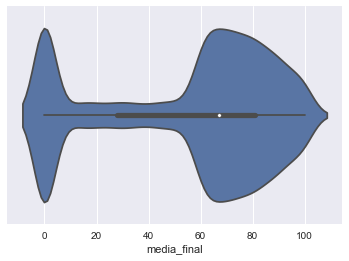

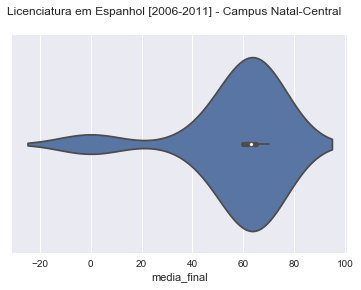

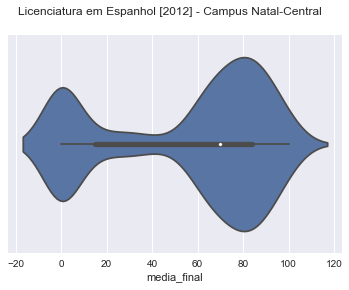

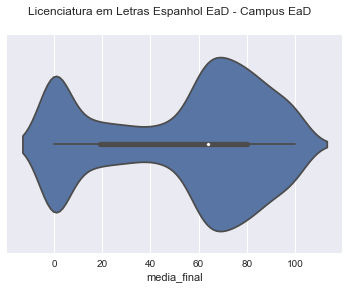

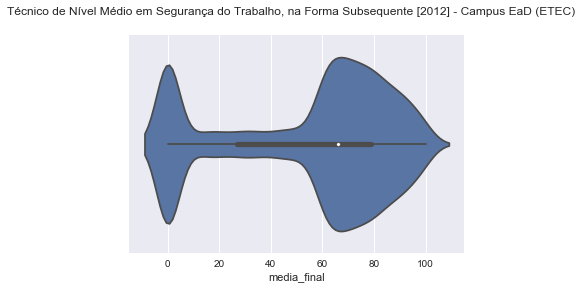

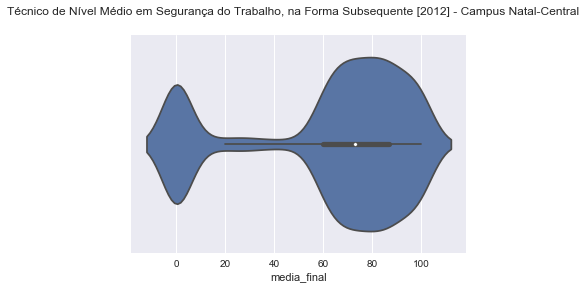

In [19]:
"""
é exibido os gráficos violinos por curso
"""
#gerar gráficos
%matplotlib inline
plt.close('all')

sns.violinplot(df['media_final'])

for index1, group1 in df.groupby(['descricao']):    
    fig = plt.figure()
    sns.plt.suptitle(index1)
    sns.violinplot(df[df.descricao == index1]['media_final'])


In [30]:
"""
é verificado o teste de independência par a par entre os cursos na perspectiva dos alunos aprovados e reprovados
"""

#test de normalidade
#stats.normaltest

#test se duas amostras são da mesma distribuição
df_ind0 = pd.DataFrame()
df_ind1 = pd.DataFrame()

#dois loops para testar par a par entre os cursos
for index1, group1 in df.groupby(['descricao']):      
    arr_test0 = []
    arr_test1 = []
    
    for index2, group2 in df.groupby(['descricao']):
        #recupera a média dos alunos reprovados por curso
        mf10 = df[(df.descricao == index1) & (df.classe == 0)]['media_final']
        mf20 = df[(df.descricao == index2) & (df.classe == 0)]['media_final']
        
        #recupera a média dos alunos aprovados por curso
        mf11 = df[(df.descricao == index1) & (df.classe == 1)]['media_final']
        mf21 = df[(df.descricao == index2) & (df.classe == 1)]['media_final']
    
        #realiza o teste de independência
        arr_test0.append( stats.ttest_ind(mf10, mf20, equal_var=False).pvalue )
        arr_test1.append( stats.ttest_ind(mf11, mf21, equal_var=False).pvalue )
        
    #salvando os testes
    df_ind0[index1] = arr_test0
    df_ind1[index1] = arr_test1    
    #break

C:\Users\Thiago\Anaconda3\lib\site-packages\numpy\core\_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)
C:\Users\Thiago\Anaconda3\lib\site-packages\numpy\core\_methods.py:116: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Thiago\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Thiago\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Thiago\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


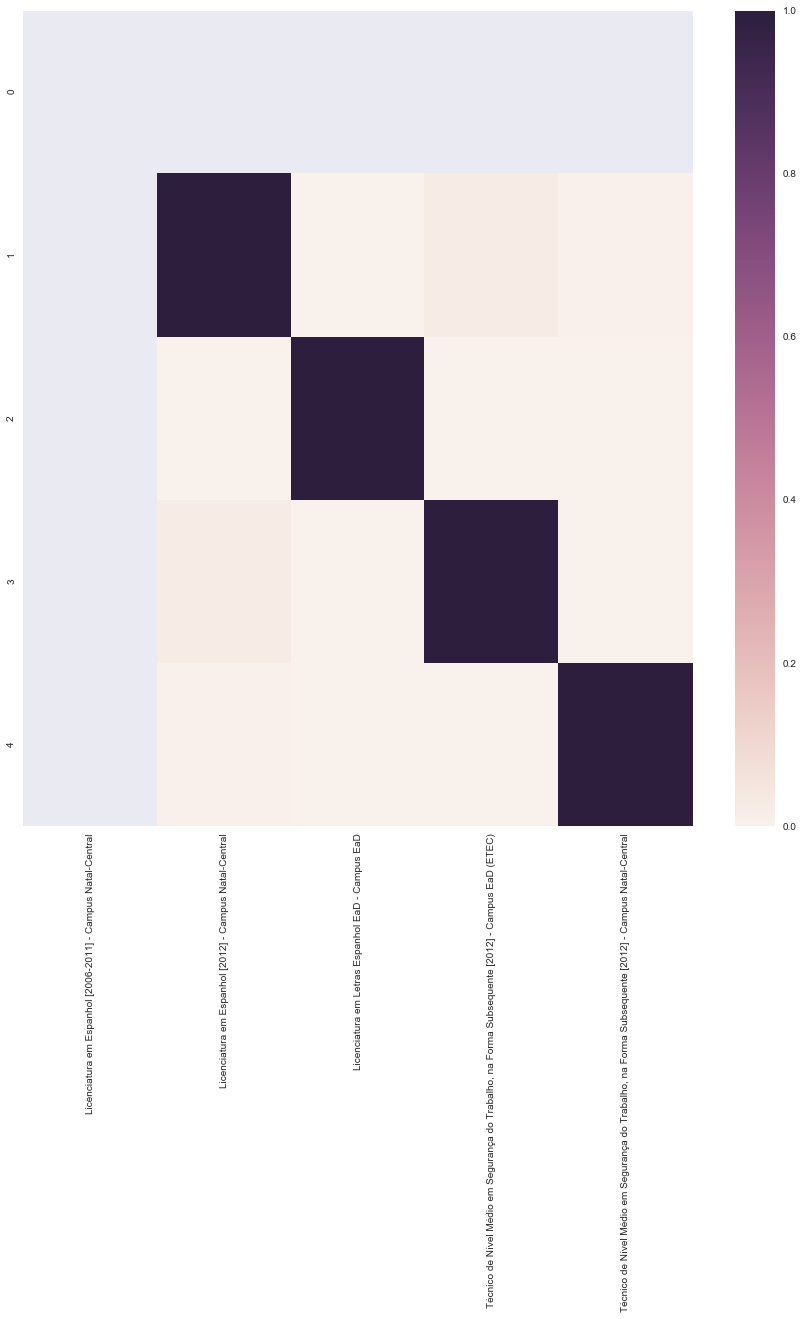

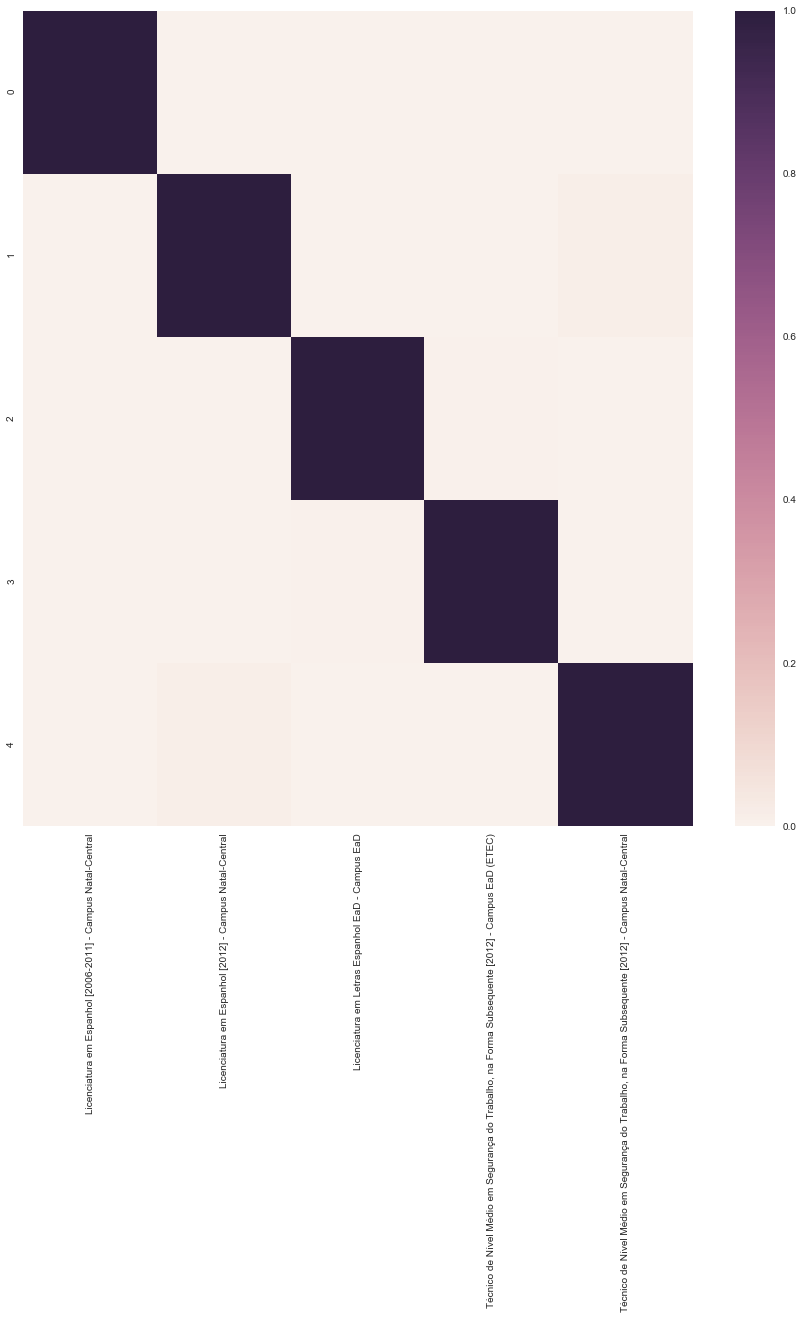

In [31]:
"""
é exibido o resultado dos testes
"""
#grafico de testes
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_ind0)

fig = plt.figure()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(df_ind1)

In [22]:
"""
gerando dados para R 

obs.:
- ao fazer o merge com df_Caracterizacao foi de 36436 para 35029
- o merge com a tabela df_Idiomas não teve chave correspondente
"""
dados = pd.merge(df_Notas, df_Disciplina, 
                 left_on="disciplina_id", right_on="id", suffixes=["_notas", "_disciplina"])
dados = pd.merge(dados, df_MatriculaPeriodo, 
                 left_on="matricula_periodo_id", right_on="id", suffixes=["", "_mat_periodo"])
dados = pd.merge(dados, df_Caracterizacao, 
                 left_on="aluno_id", right_on="aluno_id", suffixes=["", "_caracterizacao"])
dados = pd.merge(dados, df_aluno, 
                 left_on="aluno_id", right_on="id", suffixes=["", "_aluno"])
dados = pd.merge(dados, df_CursoCampus, 
                 left_on="curso_campus_id", right_on="id", suffixes=["", "_curso"])
dados = pd.merge(dados, df_Raca, 
                 left_on="raca_id", right_on="id", suffixes=["", "_raca"])
dados = pd.merge(dados, df_EstadoCivil, 
                 left_on="estado_civil_id", right_on="id", suffixes=["", "_estado_civil"])
dados = pd.merge(dados, df_SituacaoMatricula, 
                 left_on="situacao_id", right_on="id", suffixes=["", "_situacao_matricula"])
dados = pd.merge(dados, df_CompanhiaDomiciliar, 
                 left_on="companhia_domiciliar_id", right_on="id", suffixes=["", "_companhia_domiciliar"])
dados = pd.merge(dados, df_NivelEscolaridade, 
                 left_on="mae_nivel_escolaridade_id", right_on="id", suffixes=["", "_mae_escolaridade"])
dados = pd.merge(dados, df_NivelEscolaridade, 
                 left_on="pai_nivel_escolaridade_id", right_on="id", suffixes=["", "_pai_escolaridade"])
dados = pd.merge(dados, df_NivelEscolaridade, 
                 left_on="responsavel_financeiro_nivel_escolaridade_id", right_on="id", suffixes=["", "_responsavel_escolaridade"])
dados = pd.merge(dados, df_RazaoAfastamentoEducacional, how='left', 
                 left_on="razao_ausencia_educacional_id", right_on="id", suffixes=["", "_afastamento"])
dados = pd.merge(dados, df_TipoAreaResidencial, 
                 left_on="tipo_area_residencial_id", right_on="id", suffixes=["", "_area_residencial"])
dados = pd.merge(dados, df_TipoImovelResidencial, 
                 left_on="tipo_imovel_residencial_id", right_on="id", suffixes=["", "_imovel"])
dados = pd.merge(dados, df_TipoServicoSaude, how='left', 
                 left_on="tipo_servico_saude_id", right_on="id", suffixes=["", "_saude"])
dados = pd.merge(dados, df_TipoAcessoInternet, how='left', 
                 left_on="frequencia_acesso_internet_id", right_on="id", suffixes=["", "_internet"])
dados = pd.merge(dados, df_SituacaoTrabalho,  
                 left_on="trabalho_situacao_id", right_on="id", suffixes=["", "_trabalho"])
dados = pd.merge(dados, df_ContribuinteRendaFamiliar, 
                 left_on="responsavel_financeiro_id", right_on="id", suffixes=["", "_responsavel_financeiro"])
dados = pd.merge(dados, df_SituacaoTrabalho,
                 left_on="responsavel_financeir_trabalho_situacao_id", right_on="id", suffixes=["", "_trabalho_responsavel"])

print(dados.shape)



(35029, 95)


In [23]:
"""
é realizado o tratamento dos NAN individualmente 
"""

#classe social de acordo com o IBGE. havia um grande numero de registros com 0.0, logo foi atribuído missing
bins = [-1, 0, 1874, 3748, 9370, 18740, 20000]
group_names = ['missing', 'E', 'D', 'C', 'B', 'A']
dados['categorias'] = pd.cut(dados['renda_bruta_familiar'], bins, labels=group_names)
#ANALISE
#dados.ix[dados.renda_bruta_familiar == 0.0, 'categorias'] = 'missing'
#pd.set_option('display.max_rows', None)
#print(dados[dados.categorias.isnull()][['aluno_id','categorias', 'renda_bruta_familiar', 'descricao_historico', 'descricao']])
#print(dados[dados.renda_bruta_familiar == 0.0][['aluno_id','categorias', 'renda_bruta_familiar', 'descricao_historico', 'descricao']])
#print(dados[dados.categorias == 'B'][['aluno_id','categorias', 'renda_bruta_familiar', 'descricao']])

#atributo qnt_pc: simplificar a quantidade de computadores. 
#após análise foi identificado que a média de pc entre todas as classes sociais é a mesma
dados['qnt_pc'] = dados.quantidade_computadores + dados.quantidade_netbooks + dados.quantidade_notebooks
dados['qnt_pc'].fillna(dados['qnt_pc'].median(), inplace=True)
#ANALISE
#print(dados[dados.qnt_pc.isnull()][['aluno_id','renda_bruta_familiar', 'descricao']].shape)
#print(dados.groupby('categorias')['qnt_pc'].describe().unstack()  )

#tratando os NAN do atributo 'quantidade_smartphones' 
tab_smart = pd.crosstab(index = dados["categorias"], columns = dados["quantidade_smartphones"], normalize='index')
#ANALISE
#print(dados[dados.quantidade_smartphones.isnull()][['aluno_id','categorias', 'descricao']].shape)
#print(dados.groupby('categorias')['quantidade_smartphones'].describe().unstack()  )
#print(tab_smart)
#print(tab_smart.loc['E', :])
#print(tab_smart.columns)

#para cada classe social realizar sorteio com chances proporcionais de qnt de smartphone
#de acordo com sua classe social
for index1, group1 in dados.groupby(['categorias']):    
    qnt = dados[(dados.categorias == index1) & (dados.quantidade_smartphones.isnull())]['categorias'].count()    
    
    #teste para verificar se há ao menos 1 único smartphone na combinação categoria X null
    if tab_smart.loc[index1, :].sum() > 0:
        print(index1)
        #roleta
        res = np.random.choice(tab_smart.columns, qnt, p=tab_smart.loc[index1, :])
    
        #atribuindo o resultado
        dados.loc[(dados.categorias == index1) & (dados.quantidade_smartphones.isnull()), 'quantidade_smartphones'] = res

#preenche os NAN com missing ou -1 qnd inteiro
dados['ficou_tempo_sem_estudar'].fillna('missing', inplace=True)
dados['local_acesso_internet'].fillna('missing', inplace=True)
dados['descricao_afastamento'].fillna('missing', inplace=True)
dados['tempo_sem_estudar'].fillna(-1, inplace=True)
dados['descricao_saude'].fillna('missing', inplace=True)
dados['descricao_internet'].fillna('missing', inplace=True)
dados['nome_escola_ensino_fundamental'].fillna('missing', inplace=True)
dados['nome_escola_ensino_medio'].fillna('missing', inplace=True)

missing
E
D
C
B


In [33]:
#selecao de dados
dados = dados[[
    'aluno_id', 'qtd_filhos', 'media_final', 'percentual_frequencia', 'ch_hora_relogio', 'ano_letivo__ano',
    'periodo_letivo', 'ensino_fundamental_conclusao', 'ano_letivo__ano_aluno', 
    'qtd_pessoas_domicilio', 'qnt_pc', 'quantidade_smartphones',
    'renda_bruta_familiar', 'tempo_sem_estudar',
    'descricao_historico', 'aluno_exclusivo_rede_publica', 
    'descricao_companhia_domiciliar','ficou_tempo_sem_estudar', 'descricao_internet',
    'local_acesso_internet', 'descricao_mae_escolaridade', 
    'nome_escola_ensino_fundamental', 'nome_escola_ensino_medio', 'descricao_pai_escolaridade', 
    'possui_necessidade_especial', 'descricao_afastamento', 'descricao_trabalho_responsavel', 
    'descricao_responsavel_financeiro', 'descricao_responsavel_escolaridade',  
    'descricao_area_residencial', 'descricao_imovel', 'descricao_saude', 
    'descricao_trabalho', 'cep', 'pessoa_fisica__nascimento_data', 
    'descricao', 'codigo_censup', 'codigo_siape', 'descricao_raca', 'inativo_siape', 'descricao_estado_civil',
    'descricao_situacao_matricula', 'categorias'
]]



In [34]:
#removendo as linhas com NAN após o tramento
print(dados.shape)
dados.dropna(inplace=True)
print(dados.shape)
#print(dados.isnull().any())

#exibindo todas as colunas
#pd.set_option('display.max_columns', None)
dados

(34799, 43)
(34799, 43)


,aluno_id,qtd_filhos,media_final,percentual_frequencia,ch_hora_relogio,ano_letivo__ano,periodo_letivo,ensino_fundamental_conclusao,ano_letivo__ano_aluno,qtd_pessoas_domicilio,qnt_pc,quantidade_smartphones,renda_bruta_familiar,tempo_sem_estudar,descricao_historico,aluno_exclusivo_rede_publica,descricao_companhia_domiciliar,ficou_tempo_sem_estudar,descricao_internet,local_acesso_internet,descricao_mae_escolaridade,nome_escola_ensino_fundamental,nome_escola_ensino_medio,descricao_pai_escolaridade,possui_necessidade_especial,descricao_afastamento,descricao_trabalho_responsavel,descricao_responsavel_financeiro,descricao_responsavel_escolaridade,descricao_area_residencial,descricao_imovel,descricao_saude,descricao_trabalho,cep,pessoa_fisica__nascimento_data,descricao,codigo_censup,codigo_siape,descricao_raca,inativo_siape,descricao_estado_civil,descricao_situacao_matricula,categorias
0,471409825937,1.0,85,100.0,60,2016,1,2000,2015,1,1.0,1.0,1911.3,-1.0,Introdução ao Direito(60H),True,Sozinho(a),1,missing,missing,Ensino médio incompleto,Colégio Salesiano São José,Colégio Salesiano São José,Ensino superior completo,True,missing,Serviço público,O próprio aluno,Ensino superior completo,Urbana,Financiado,missing,Serviço público,59082-420,17/06/1986,Técnico de Nível Médio em Segurança do Trabalh...,0,9,Não declarado,False,Casado(a),Trancado,D
1,471409825937,1.0,80,90.0,60,2016,1,2000,2015,1,1.0,0.0,1911.3,-1.0,Introdução à Segurança do Trabalho(60H),True,Sozinho(a),1,missing,missing,Ensino médio incompleto,Colégio Salesiano São José,Colégio Salesiano São José,Ensino superior completo,True,missing,Serviço público,O próprio aluno,Ensino superior completo,Urbana,Financiado,missing,Serviço público,59082-420,17/06/1986,Técnico de Nível Médio em Segurança do Trabalh...,0,9,Não declarado,False,Casado(a),Trancado,D
2,471409825937,1.0,83,100.0,60,2016,1,2000,2015,1,1.0,1.0,1911.3,-1.0,Desenvolvimento de Projeto Integrador,True,Sozinho(a),1,missing,missing,Ensino médio incompleto,Colégio Salesiano São José,Colégio Salesiano São José,Ensino superior completo,True,missing,Serviço público,O próprio aluno,Ensino superior completo,Urbana,Financiado,missing,Serviço público,59082-420,17/06/1986,Técnico de Nível Médio em Segurança do Trabalh...,0,9,Não declarado,False,Casado(a),Trancado,D
3,471409825937,1.0,90,85.0,30,2016,1,2000,2015,1,1.0,0.0,1911.3,-1.0,"Filosofia, Ciência e Tecnologia",True,Sozinho(a),1,missing,missing,Ensino médio incompleto,Colégio Salesiano São José,Colégio Salesiano São José,Ensino superior completo,True,missing,Serviço público,O próprio aluno,Ensino superior completo,Urbana,Financiado,missing,Serviço público,59082-420,17/06/1986,Técnico de Nível Médio em Segurança do Trabalh...,0,9,Não declarado,False,Casado(a),Trancado,D
4,471409825937,1.0,67,100.0,30,2016,1,2000,2015,1,1.0,1.0,1911.3,-1.0,Sociologia do Trabalho,True,Sozinho(a),1,missing,missing,Ensino médio incompleto,Colégio Salesiano São José,Colégio Salesiano São José,Ensino superior completo,True,missing,Serviço público,O próprio aluno,Ensino superior completo,Urbana,Financiado,missing,Serviço público,59082-420,17/06/1986,Técnico de Nível Médio em Segurança do Trabalh...,0,9,Não declarado,False,Casado(a),Trancado,D
5,471409825937,1.0,85,100.0,30,2016,1,2000,2015,1,1.0,1.0,1911.3,-1.0,Seminário de Iniciação à Pesquisa(30H),True,Sozinho(a),1,missing,missing,Ensino médio incompleto,Colégio Salesiano São José,Colégio Salesiano São José,Ensino superior completo,True,missing,Serviço público,O próprio aluno,Ensino superior completo,Urbana,Financiado,missing,Serviço público,59082-420,17/06/1986,Técnico de Nível Médio em Segurança do Trabalh...,0,9,Não declarado,False,Casado(a),Trancado,D
6,471409825937,1.0,74,93.0,60,2016,1,2000,2015,1,1.0,1.0,1911.3,-1.0,Primeiros Socorros(60H),True,Sozinho(a),1,missing,missing,Ensino médio incompleto,Colégio Salesiano São José,Colégio Salesiano São José,Ensino superior completo,True,missing,Serviço público,O próprio aluno,Ensino superior completo,

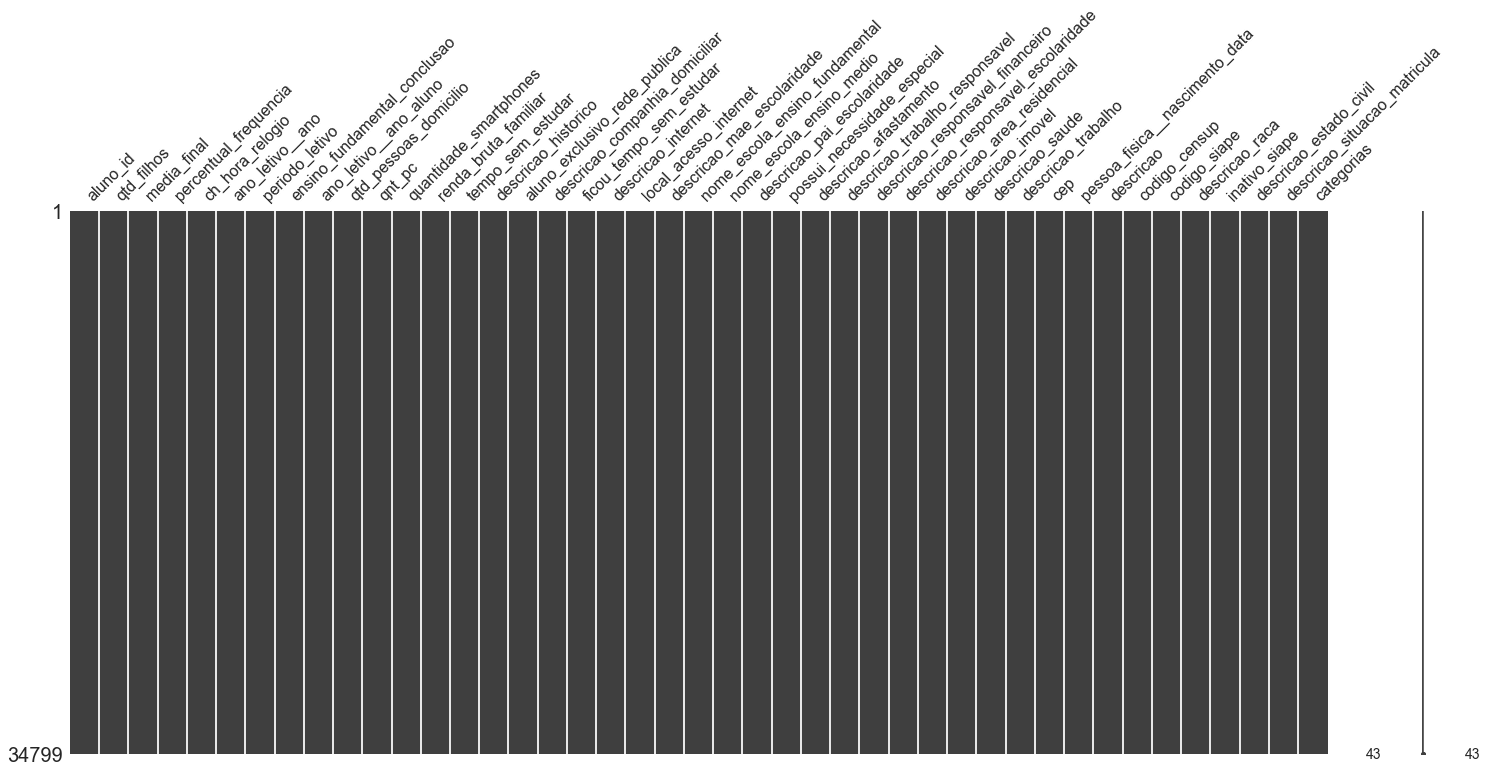

In [35]:
#exibindo consistencias dos dados
import missingno as msno
%matplotlib inline
msno.matrix(dados)

In [39]:
#salvando dados para analisar em R
dados.to_csv("dadoslimpos.csv", encoding='utf-8')
dados.to_json("dadoslimpos.json")

In [37]:
print(dados.isnull().any())

aluno_id                              False
qtd_filhos                            False
media_final                           False
percentual_frequencia                 False
ch_hora_relogio                       False
ano_letivo__ano                       False
periodo_letivo                        False
ensino_fundamental_conclusao          False
ano_letivo__ano_aluno                 False
qtd_pessoas_domicilio                 False
qnt_pc                                False
quantidade_smartphones                False
renda_bruta_familiar                  False
tempo_sem_estudar                     False
descricao_historico                   False
aluno_exclusivo_rede_publica          False
descricao_companhia_domiciliar        False
ficou_tempo_sem_estudar               False
descricao_internet                    False
local_acesso_internet                 False
descricao_mae_escolaridade            False
nome_escola_ensino_fundamental        False
nome_escola_ensino_medio        

In [ ]:
#verificar quantidade de amostras necessárias
merged = pd.merge(df_Notas, df_Disciplina, left_on="disciplina_id", right_on="id", suffixes=["_L", "_R"])

#filtra disciplinas com registros maiores que 1
merged = merged.groupby('disciplina_id').filter(lambda x: len(x) > 1)

#criar coluna classe no merged
merged['classe'] = np.ones(merged.shape[0])*-1

#n_min
n = []

#definir linha que divide os clusters (alunos bons e ruins)
for index1, group1 in merged.groupby(['disciplina_id']):    
    
    #recuperando as notas apenas daquela disciplina    
    data = merged[merged.disciplina_id == index1]['media_final']
    
    #recuperando os clusters
    cluster = KMeans(n_clusters=2, init=np.array([[0], [10]]))
    cluster.fit(data.reshape(-1,1))
    
    #atribuindo a classe
    merged.loc[merged.disciplina_id == index1, 'classe'] = cluster.predict(data.reshape(-1,1))
    
    #testando a quantidade de amostras
    mf0 = merged[(merged.disciplina_id == index1) & (merged.classe == 0)]['media_final']
    mf1 = merged[(merged.disciplina_id == index1) & (merged.classe == 1)]['media_final']
    
    n.append( ((2.306*mf0.std())/2)**2 )
    n.append( ((2.306*mf1.std())/2)**2 ) 
    
print(max(n))
print(min(n))
#(1.96*0.3/0.1)**2